Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [28]:
NAME = "Gasper Bizjan"

---

## Assignment 2 - Object Oriented Programming

-----------------------------------------
The following is intended to make you familiar with the concepts of object oriented programming in python3. We will structure our finite element methode in classes with certain properties and functions. This will make the code easier to understande. 

### 2.1 Class Definition

Assume a function $f\colon [a,b] \longrightarrow \mathbb{R}$ and the discrete pointsets $\{x_i\}_1^n\subset [a,b]$.

Write a class ```DiscreteFunction``` which represents the interpolation of a given function $f$ with respect to $\{x_i\}_1^n$. The pointwise evaluations should be stored as $\{f_i\}_1^n$ with $f_i = f(x_i)$ for ever $i$.<br>

#### constructor
Write the class constructor ```__init__```. It has to store the Variables $a,b,n$ and has to inital ```self.x``` by a numpy-array with $x_i = (b-a)\frac{i}{n}$ as a representation of $\{x_i\}_1^n$ and ```self.f``` also a numpy-array with $f_i=0$ as the represention of $\{f_i\}_1^n$. <br>
<b>INPUT:</b> $a,b$ - float, Interval boundaries $n$ - integer, number of points <br>


#### interpolate
Write a property called ```interpolate``` which evaluates a lambda-function $f$ with respect to $\{x_i\}_1^n$. <br>
<b>INPUT:</b> $f$ - lambda function 

#### show
Write a property called ```show``` which plots $\{x_i\}_1^n$ against $\{f_i\}_1^n$ and shows it on the screen. 

#### evaluation (Optional)

In the following assignments, optional tasks will either going deeper in concept of the finite element method or in the python3 standart and you can prepare it volentary.   

Up to now the discrete function can be only evaluated in $x_i$ but not in between. Overload the evaluation oprerator () defined by the property ```__call__``` to evaluate the discrete function in a certain point $x\in [a,b]$. You can either use a standart interpolation method or feel free to do it in your own way. If you want to switch the method, you can add an optional argument ```methode='yourDefaultMethodeHere'``` to select the method during runtime. <br>
<b>INPUT:</b> $x$ - float <br>
<b>OUTPUT:</b> $float$ - evaluation of the discrete function

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d # Using scipy's integrated interpolation tools

# YOUR CODE HERE

class DiscreteFunction:
    def __init__(self, a, b, n):
        self.a = a
        self.b = b
        self.n = n
        #self.x = np.linspace((b-a)*1/n, (b-a), num=n) # Mistake of instructions (only works from 0 to 1)
        self.x = np.linspace(a, b, num=n)
        self.f = np.zeros(n)
        
    def interpolate(self, f):
        self.f = f(self.x)
        return self.f
    
    def show(self):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        # plotting
        ax.plot(self.x, self.f, 'o')
        ax.plot(self.x, self.f, '-')
        # formating
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$f(x)$')
        # display the plot
        ax.grid()
        plt.show()
        
    def __call__(self, x_h, methode='linear'): # overload
        f_h = interp1d(self.x, self.interpolate(f), kind=methode) 
        return f_h(x_h)

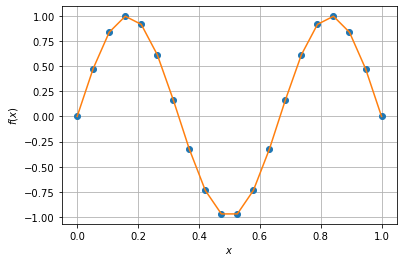

f(0.25) = 0.7071067811865476
fh(0.25) = 0.6896028661810152


In [27]:
### This is a read only cell. Please don't not delete it. 

### declaration
fh = DiscreteFunction(0,1,20)

### interpolation
f = lambda x: np.sin(3*np.pi*x)
fh.interpolate(f)

### ploting
fh.show()

### calling (with error handling)
x = 0.25
print( 'f(0.25) =' , f(0.25) )
try:
    print( 'fh(0.25) =' , fh(0.25) )
except:
    pass